In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
df=pd.read_csv("C:\\Users\\naval\\Downloads\\archive (10)\\vgsales.csv")
df.head(10)

NameError: name 'pd' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
df.fillna(df.mode(),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

In [18]:
numerical_col=df.select_dtypes(include=['int64','float64']).columns
categorical_col=df.select_dtypes(include=['object']).columns
numerical_col


Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [19]:
categorical_col

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

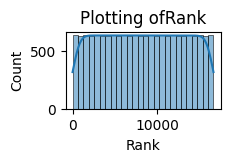

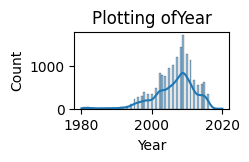

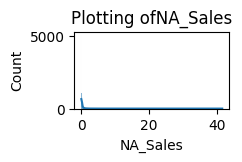

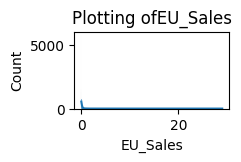

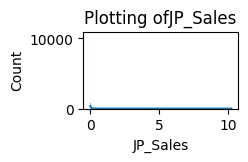

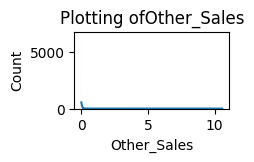

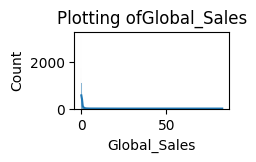

In [20]:
for col in numerical_col:
    plt.figure(figsize=(2,1))
    sns.histplot(df[col],kde=True)
    plt.title(f'Plotting of{col}')

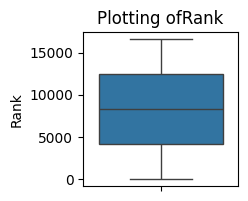

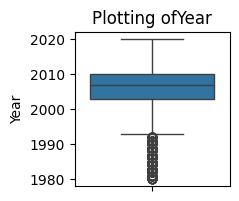

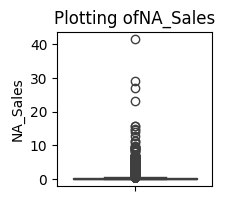

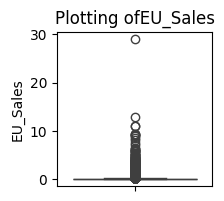

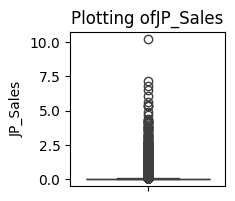

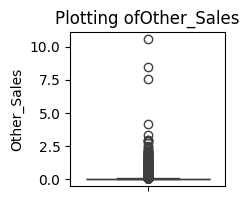

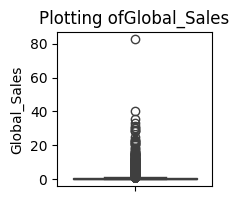

In [21]:
for col in numerical_col:
    plt.figure(figsize=(2,2))
    sns.boxplot(df[col])
    plt.title(f'Plotting of{col}')

In [22]:
df[categorical_col].nunique()

Name         11493
Platform        31
Genre           12
Publisher      578
dtype: int64

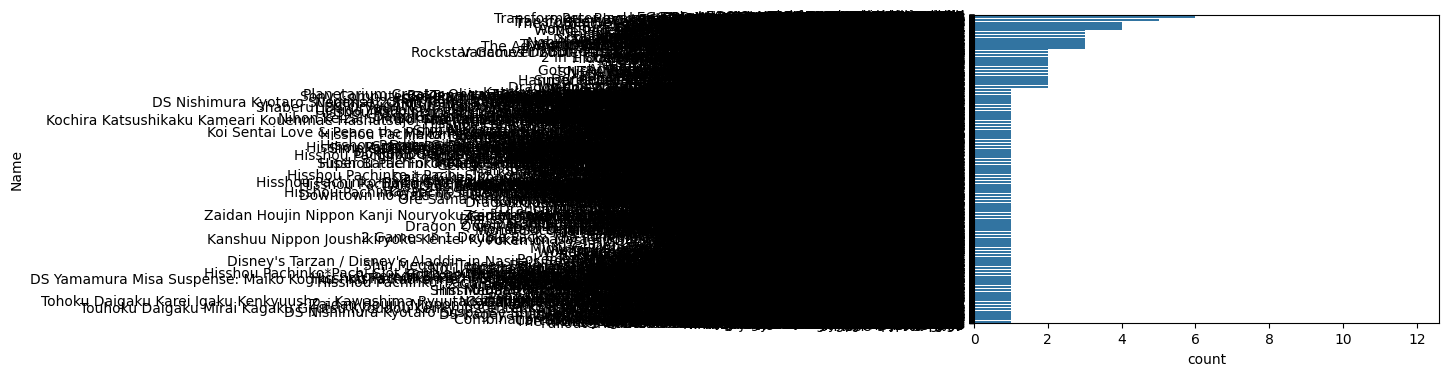

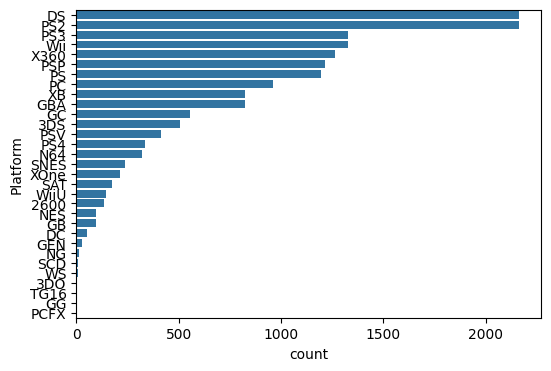

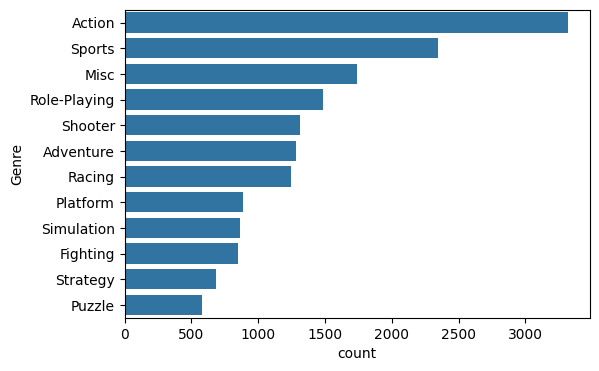

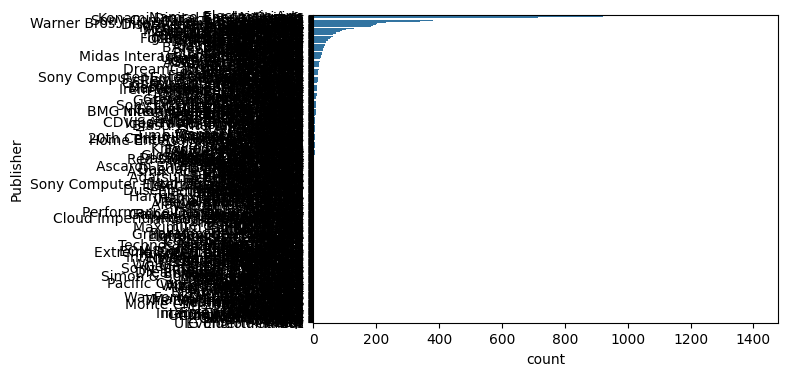

In [23]:
for col in categorical_col:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col],order=df[col].value_counts().index)
    plt.show()

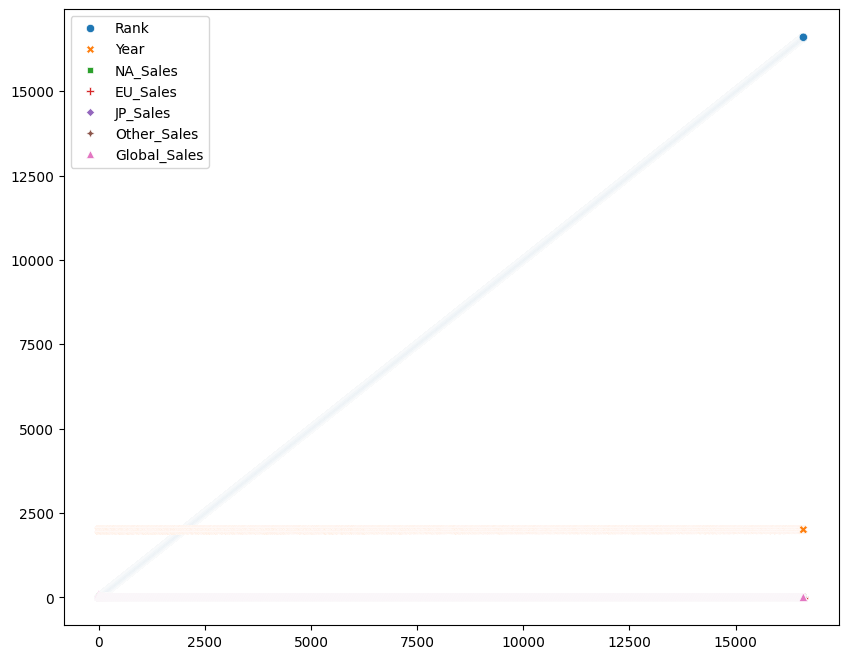

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(df[numerical_col])
plt.show()

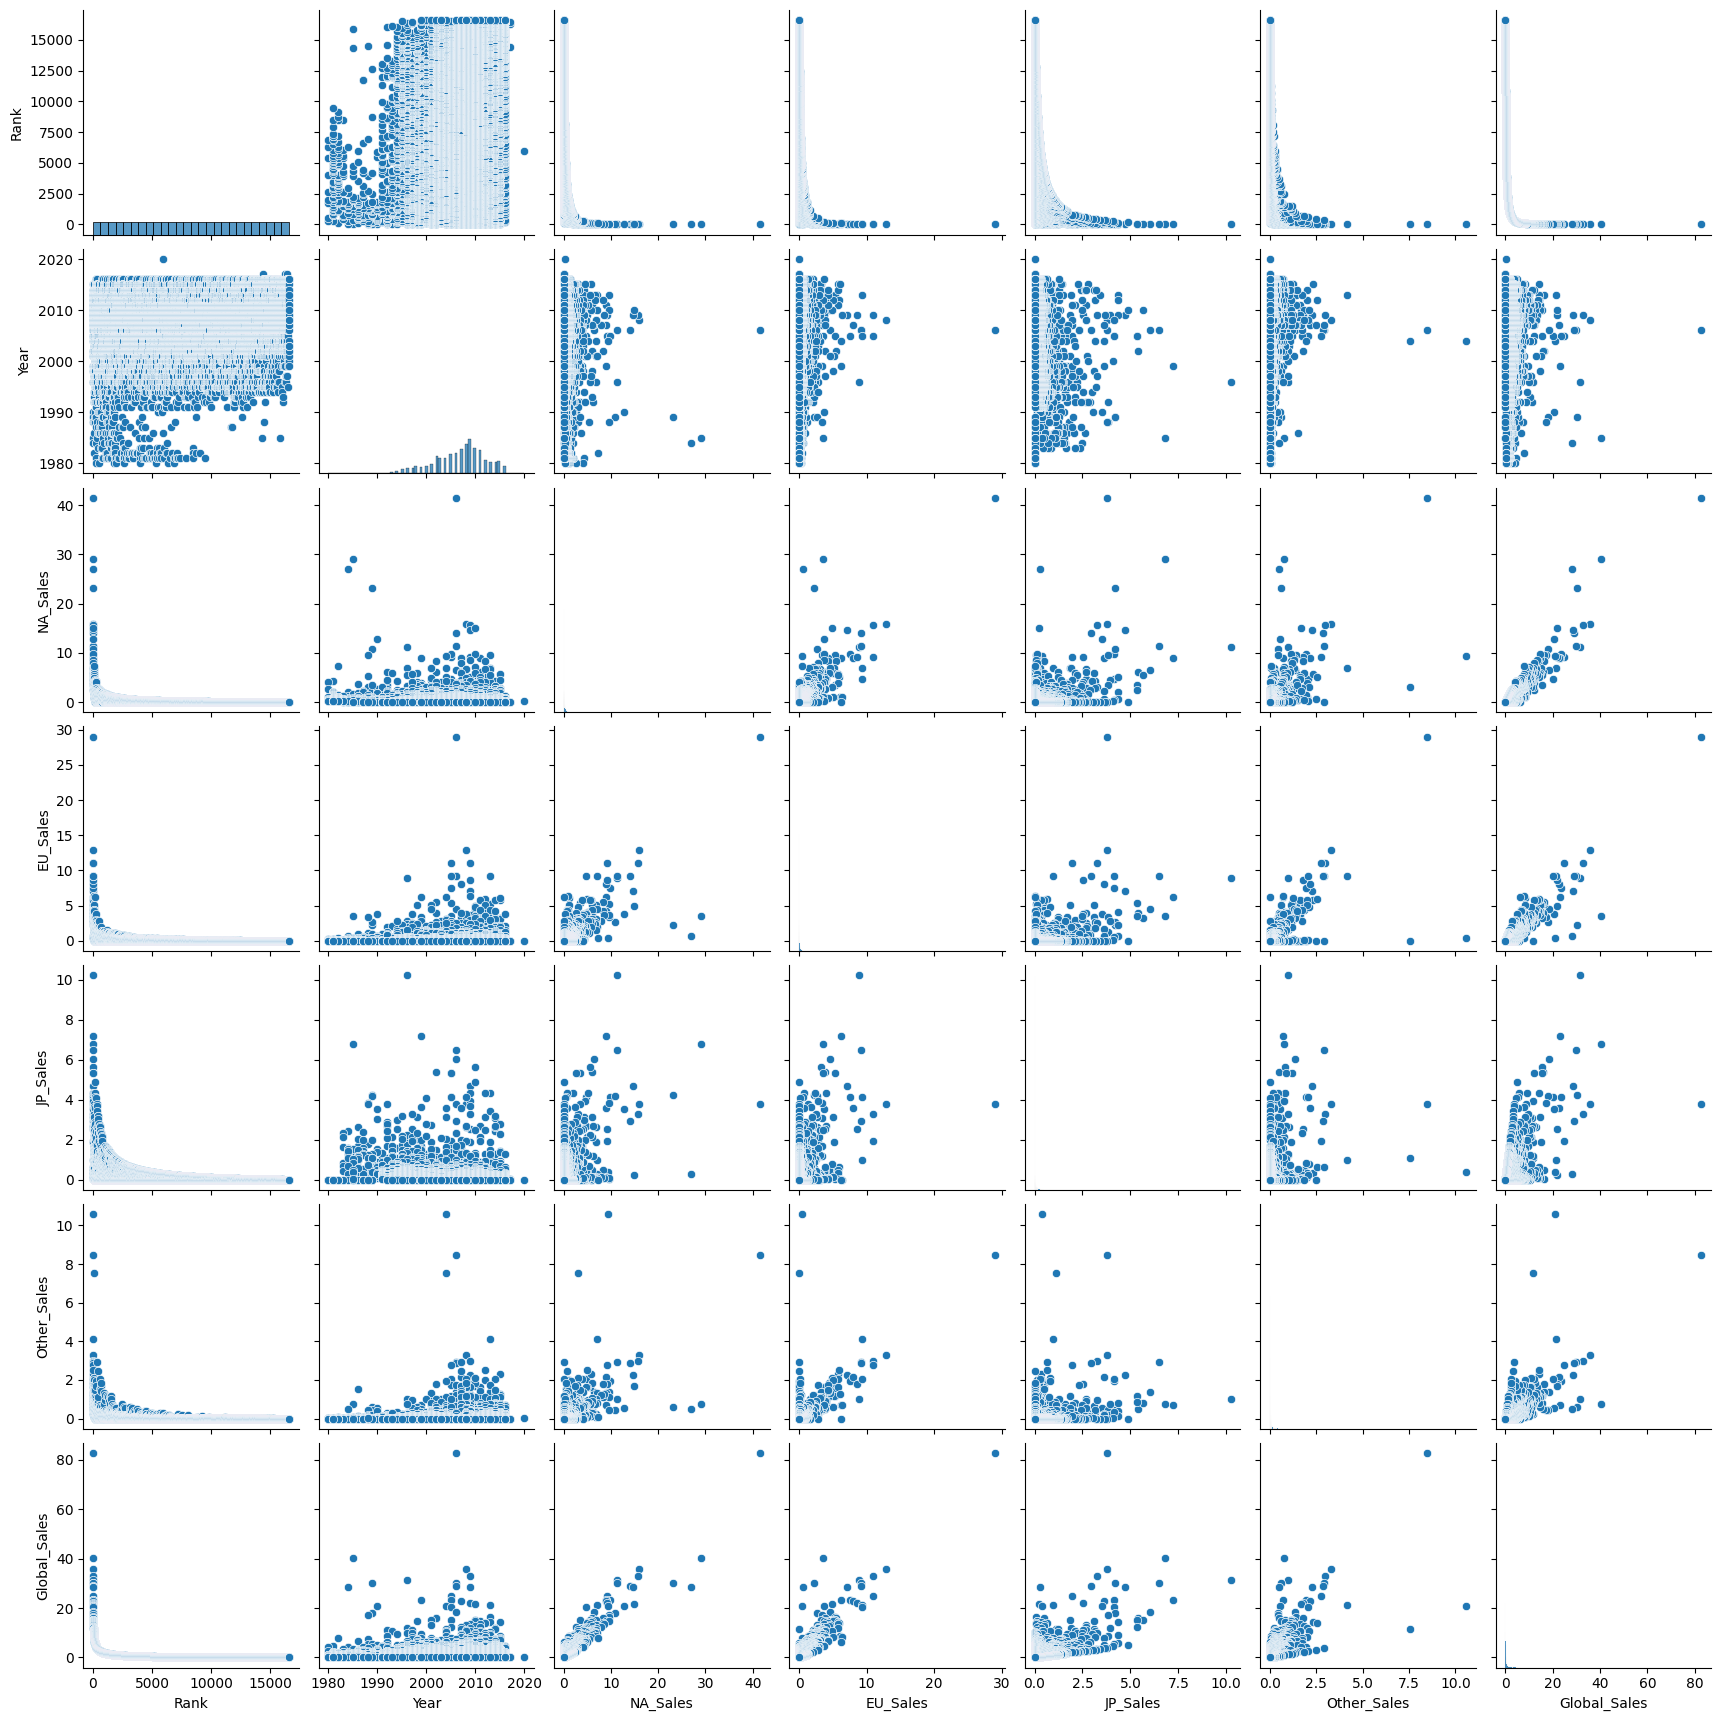

In [25]:
sns.pairplot(df[numerical_col])
plt.show()

In [26]:
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_col] < (Q1 - 1.5 * IQR)) | (df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
print(Q1)

print(Q3)

print(IQR)

Rank            4151.25
Year            2003.00
NA_Sales           0.00
EU_Sales           0.00
JP_Sales           0.00
Other_Sales        0.00
Global_Sales       0.06
Name: 0.25, dtype: float64
Rank            12449.75
Year             2010.00
NA_Sales            0.24
EU_Sales            0.11
JP_Sales            0.04
Other_Sales         0.04
Global_Sales        0.47
Name: 0.75, dtype: float64
Rank            8298.50
Year               7.00
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.41
dtype: float64


In [28]:
df.to_csv('AFter_Analysis_dataset.csv',index=False)